In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ananthu017/emotion-detection-fer

 98% 64.0M/65.2M [00:04<00:00, 17.3MB/s]
100% 65.2M/65.2M [00:04<00:00, 14.2MB/s]


In [ ]:
! unzip '/content/emotion-detection-fer.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense,BatchNormalization
import keras
import os

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=15,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [ ]:
s =48

In [ ]:
training_set = train_datagen.flow_from_directory(
    '/content/train', 
    color_mode="grayscale",
    target_size=(s,s),
    batch_size=50,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    '/content/test', 
    color_mode="grayscale",
    target_size=(s,s),
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


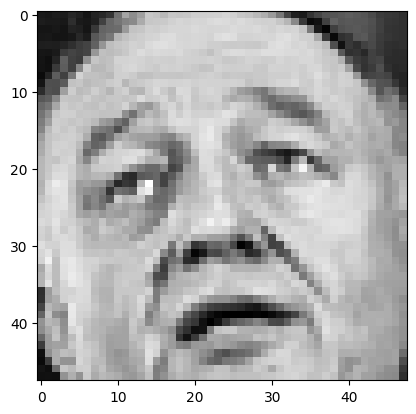

In [ ]:
image, label = test_set.next()
plt.imshow(image[0],cmap='gray')

In [ ]:
label_map = dict((v,k) for k,v in training_set.class_indices.items())
label_map

{0: 'angry',
 1: 'disgusted',
 2: 'fearful',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprised'}

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(s,s, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax')) # 7 because we have 7 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       7

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    mode='max'
)
res = model.fit(training_set,
          epochs = 100,
          callbacks=[custom_early_stopping],
          validation_data = test_set)

Epoch 1/100
575/575 [==============================] - 48s 57ms/step - loss: 2.0906 - accuracy: 0.2288 - val_loss: 2.2342 - val_accuracy: 0.2452
Epoch 2/100
575/575 [==============================] - 32s 56ms/step - loss: 1.7254 - accuracy: 0.3254 - val_loss: 1.6135 - val_accuracy: 0.3473
Epoch 3/100
575/575 [==============================] - 31s 54ms/step - loss: 1.5191 - accuracy: 0.4114 - val_loss: 1.4458 - val_accuracy: 0.4529
Epoch 4/100
575/575 [==============================] - 32s 55ms/step - loss: 1.3927 - accuracy: 0.4648 - val_loss: 1.2728 - val_accuracy: 0.5176
Epoch 5/100
575/575 [==============================] - 31s 54ms/step - loss: 1.3308 - accuracy: 0.4901 - val_loss: 1.2125 - val_accuracy: 0.5375
Epoch 6/100
575/575 [==============================] - 32s 56ms/step - loss: 1.2801 - accuracy: 0.5166 - val_loss: 1.2235 - val_accuracy: 0.5393
Epoch 7/100
575/575 [==============================] - 31s 54ms/step - loss: 1.2383 - accuracy: 0.5321 - val_loss: 1.0951 - val_ac

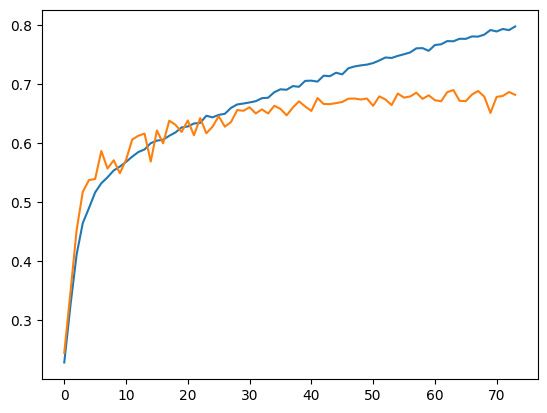

In [ ]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])

In [ ]:
model.evaluate(test_set)

225/225 [==============================] - 3s 15ms/step - loss: 1.0578 - accuracy: 0.6817


[1.0577839612960815, 0.6816661953926086]

In [ ]:
model.save('/content/drive/MyDrive/saved/ff.h5')

In [ ]:
# model.save_weights('/content/drive/MyDrive/saved/weights.h5')